<a href="https://colab.research.google.com/github/Bryan-eng-lng/Deep-Learning-Projects-/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 87% 569M/658M [00:12<00:02, 31.6MB/s]
100% 658M/658M [00:12<00:00, 55.3MB/s]


In [4]:
from zipfile import ZipFile

dataset = "/content/plantdisease.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


Importing Dependencies and Libraries

In [5]:
import os
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization , Flatten , Conv2D , MaxPooling2D

Lets See the Images and length of files

In [6]:
mainfile = os.listdir("/content/PlantVillage")

print(len(mainfile))

15


In [7]:
file1 = os.listdir("/content/PlantVillage/Pepper__bell___Bacterial_spot")

print(len(file1))

997


In [8]:
file2 = os.listdir("/content/PlantVillage/Pepper__bell___healthy")
print(len(file2))

1478


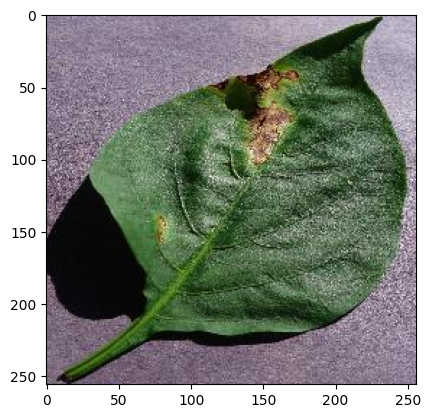

(256, 256, 3)


In [9]:
img1 = mpimg.imread("/content/PlantVillage/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG")

plt.imshow(img1)
plt.show()
print(img1.shape)

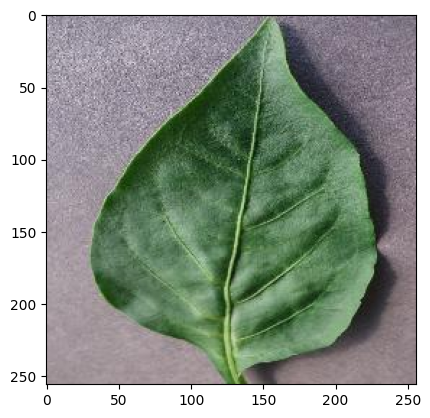

(256, 256, 3)
[[[170 164 178]
  [171 165 179]
  [161 155 169]
  ...
  [143 135 148]
  [128 120 133]
  [121 113 126]]

 [[147 141 155]
  [149 143 157]
  [136 130 144]
  ...
  [116 108 121]
  [118 110 123]
  [134 126 139]]

 [[142 136 150]
  [180 174 188]
  [181 175 189]
  ...
  [138 130 143]
  [122 114 127]
  [115 107 120]]

 ...

 [[162 150 154]
  [159 147 151]
  [157 145 149]
  ...
  [142 127 132]
  [147 132 137]
  [151 136 141]]

 [[157 145 149]
  [155 143 147]
  [153 141 145]
  ...
  [140 125 130]
  [143 128 133]
  [146 131 136]]

 [[159 147 151]
  [158 146 150]
  [157 145 149]
  ...
  [139 124 129]
  [140 125 130]
  [142 127 132]]]


In [10]:
img2 = mpimg.imread("/content/PlantVillage/Pepper__bell___healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG")

plt.imshow(img2)
plt.show()
print(img2.shape)
print(img2)

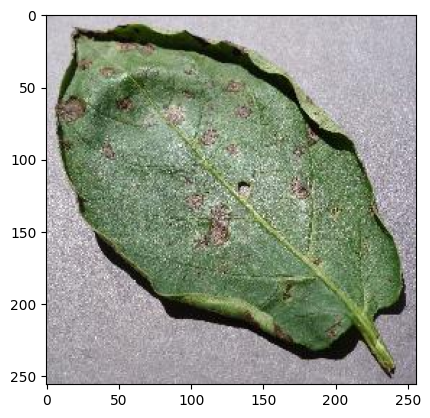

(256, 256, 3)
[[[199 196 203]
  [194 191 198]
  [187 184 191]
  ...
  [181 178 189]
  [178 175 186]
  [178 175 186]]

 [[191 188 195]
  [188 185 192]
  [185 182 189]
  ...
  [180 177 188]
  [177 174 185]
  [175 172 183]]

 [[187 184 191]
  [186 183 190]
  [186 183 190]
  ...
  [187 184 195]
  [188 185 196]
  [184 181 192]]

 ...

 [[170 168 173]
  [163 161 166]
  [152 150 155]
  ...
  [141 136 143]
  [142 137 144]
  [145 140 147]]

 [[167 165 170]
  [166 164 169]
  [145 143 148]
  ...
  [134 129 136]
  [139 134 141]
  [147 142 149]]

 [[168 166 171]
  [169 167 172]
  [163 161 166]
  ...
  [127 122 129]
  [132 127 134]
  [143 138 145]]]


In [11]:
img3 = mpimg.imread("/content/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG")

plt.imshow(img3)
plt.show()
print(img3.shape)
print(img3)

In [12]:
file3 = os.listdir("/content/PlantVillage/Potato___Early_blight")
file4 = os.listdir("/content/PlantVillage/Potato___Late_blight")
file4 = os.listdir("/content/PlantVillage/Potato___healthy")
file5 = os.listdir("/content/PlantVillage/Tomato_Bacterial_spot")
file6 = os.listdir("/content/PlantVillage/Tomato_Early_blight")
file7 = os.listdir("/content/PlantVillage/Tomato_Late_blight")
file8 = os.listdir("/content/PlantVillage/Tomato_Leaf_Mold")
file9 = os.listdir("/content/PlantVillage/Tomato_Septoria_leaf_spot")
file10 = os.listdir("/content/PlantVillage/Tomato_Septoria_leaf_spot")
file11 = os.listdir("/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite")
file12 = os.listdir("/content/PlantVillage/Tomato__Target_Spot")
file13 = os.listdir("/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus")
file14 = os.listdir("/content/PlantVillage/Tomato__Tomato_mosaic_virus")
file15 = os.listdir("/content/PlantVillage/Tomato_healthy")

print(len(file3))
print(len(file4))
print(len(file5))
print(len(file6))
print(len(file7))
print(len(file8))
print(len(file9))
print(len(file10))
print(len(file11))
print(len(file12))
print(len(file13))
print(len(file14))

1000
152
2127
1000
1909
952
1771
1771
1676
1404
3209
373


In [13]:
997+1478+1000+152+2127+1000+1909+952+1771+1771+1676+1404+3209+373

19819

Scaling the Data

In [14]:
base_dir = "/content/PlantVillage"

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)



Train Generator and Validation Generator

In [15]:
base_dir = "/content/PlantVillage"


train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (256,256),
    batch_size=10,
    subset="training",
    class_mode = "categorical"

)




Found 16516 images belonging to 15 classes.


In [16]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (256,256),
    batch_size=10,
    subset="validation",
    class_mode = "categorical"
)


Found 4122 images belonging to 15 classes.


In [17]:
14452 + 6186

20638

In [18]:
16516 + 4122

20638

Lets Build CNN and train the model

In [22]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128,activation="relu"))



model.add(Dense(15,activation="softmax"))


In [23]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],

)

model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch = train_generator.samples // 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 10
)



Epoch 1/5
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.4605 - loss: 1.7421 - val_accuracy: 0.8063 - val_loss: 0.5663
Epoch 2/5
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9000 - loss: 0.2275 - val_accuracy: 0.7910 - val_loss: 0.5982
Epoch 3/5
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - accuracy: 0.8323 - loss: 0.5154 - val_accuracy: 0.7658 - val_loss: 0.7112
Epoch 4/5
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9000 - loss: 0.4125 - val_accuracy: 0.7879 - val_loss: 0.6666
Epoch 5/5
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.9045 - loss: 0.2927 - val_accuracy: 0.8017 - val_loss: 0.6248


In [ ]:
model.evaluate(validation_generator)

413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8493 - loss: 0.5101


[0.4931260645389557, 0.8578360080718994]

Using Pretrained Model MobileNetV2